# Logistic Regression as a Neural Network

for week 2

## Data

In [23]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X = X.T  # because for some reason this video has the columns as observations...

label:  0


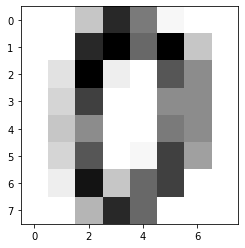

In [25]:
import matplotlib.pyplot as plt

plt.imshow(X[:, 0].reshape(8,8), cmap="Greys")
print("label: ", y[0])

In [27]:
X.shape  # this feels weird

(64, 1797)

### Setup
we want $\hat{y} = P(y = 1 | X)$, with $x \in R^{n_x}, w \in R^{n_x}, b \in R$.  

in logistic regression, $\hat{y} = \sigma (w^\top x + b)$, with $\sigma$ being the sigmoid function $\frac{1}{1 + e^{-x}}$ which maps the real number line to {0, 1} with $lim_{x \to -\infty} = 0$, $\lim_{x \to 0} = \frac{1}{2}$, and $\lim_{x \to \infty} = 1$. Since $\hat{y}$ is a probability, and we are trying to use our data to get clear predictions, we generally want to maximize $\hat{y}$ to be as close as possible to 1 for each image.

## Loss function

lots of ways to define, obvious one is $L(\hat{y}, y) = 1/2 (\hat{y} - y)^2$, but that's non-convex and so you find local minimums, so instead we use  

$L(\hat{y}, y) = -(y \log \hat{y} + (1 - y) \log(1 - \hat{y}))$

## Cost Function

$J(w, b) = \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)})$

slight abuse of notation since $\hat{y}^{(i)} = \hat{y}^{(i)}(w, b)$, $\hat{y}^{(i)} \in R$ is the function $w^\top x_i + b$ of $w$ and $b$ (also an abuse of notation, since $J(w, b)$ is actually $J(X, w, b)$)

In [70]:
import numpy as np
import warnings

def loss(yhat, y):
    if y not in {0, 1}:
        warnings.warn("Labels should be binary")
    return -1 * (y*np.log(yhat) + (1-y)*np.log(1-yhat))

print(np.round(cost(.9999999, 1)))  # case where y = 1, cost(yhat, y) = -log(yhat)
print(np.round(cost(.00000001, 0)))  # case where y = 0, cost(yhat, y) = -log(1-yhat)
print(np.round(cost(.9999999, 0)))  # case where y = 0, cost(yhat, y) = -log(1-yhat)
print(np.round(cost(.00000001, 1)))  # case where y = 0, cost(yhat, y) = -log(1-yhat)
print(np.round(cost(.5, 0)))
print(np.round(cost(.5, 1)))

print("---")

print(loss(.1, .1))  # why aren't these 0?
print(loss(.9, .9))  # why aren't these 0?
print(loss(.5, .5))  # why aren't these 0?

# not 0 because y = {0, 1}, can never be a non-integer, so the above inputs will never happen

print("---")
print(cost(.1, .9))  # should be big

0.0
0.0
16.0
18.0
1.0
1.0
---
0.3250829733914482
0.3250829733914482
0.6931471805599453
---
2.0828626352604234


/var/folders/f2/j3gn7gkj60q66ts67tfg67hw0000gn/T/ipykernel_77223/977079358.py:6: UserWarning: Labels should be binary
  warnings.warn("Labels should be binary")


## Gradient descent and viewing logistic regression as a NN

by convention, $\frac{dFinalOutputVar}{dvar}$ will be shorthand to $dvar$ in code, which is the derivative of the final output variable with respect to various intermediate quantities

In [ ]:


def d_dw(w, alpha):
    # denote as dw in code
    """
    alpha: learning rate
    """
    return w - alpha * np.nan  # TODO: np.nan = dJ(w)/dw

def d_db(b, alpha):
    # denote as db in code
    return b - alpha * np.nan  # TODO: np.nan = dJ(b)/db

